## this work is based on a survey which measures satisfaction of people regard to their belonging institution which preferred same department(sub class)

In [14]:
#import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#for checking languages
#
#for x in locale.windows_locale.values():
#    print(x.replace('_','-'))

In [4]:
#read the spss formatted .sav data 
import savReaderWriter
locale.setlocale(locale.LC_ALL, 'tr-TR')
lst=[]
with savReaderWriter.SavReader('toplamveri3.sav',ioUtf8=True,returnHeader=True) as reader:
    for line in reader:
        lst.append(line)

In [5]:
#check the data
df=pd.DataFrame(lst,columns=lst[0])
df=df.drop(df.index[0])
df.head()

,Survey_Code,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K153,K154,K155,K156,K156A,K157,K158,K159,K160,K155a
1,OM1,16,1,1,1,1,58,14,3,None,...,6,2,2,1,,1300,3,24,None,2
2,OM2,16,1,1,1,3,63,1,2,None,...,6,1,3,1,,850,2,9,None,3
3,OM3,16,1,1,1,2,75,6,4,None,...,D,6,2,1,,None,4,1,None,2
4,OM4,16,1,1,1,None,4.66,14,2,None,...,4,3,2,1,,3000,3,12,None,2
5,OM5,16,1,1,1,3,4.88,22,3,None,...,6,3,2,1,,None,1,8,None,2


In [6]:
#Some values have blanks,lets fill them with nans
df = df.replace(r'^\s*$', np.nan, regex=True)

In [7]:
df.head(5)

,Survey_Code,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K153,K154,K155,K156,K156A,K157,K158,K159,K160,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,58.00,14.0,3.0,NaN,...,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,None,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,63.00,1.0,2.0,NaN,...,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,None,3.0
3,OM3,16.0,1.0,1.0,1.0,2.0,75.00,6.0,4.0,NaN,...,D,6.0,2.0,1.0,NaN,NaN,4.0,1.0,None,2.0
4,OM4,16.0,1.0,1.0,1.0,NaN,4.66,14.0,2.0,NaN,...,4,3.0,2.0,1.0,NaN,3000.0,3.0,12.0,None,2.0
5,OM5,16.0,1.0,1.0,1.0,3.0,4.88,22.0,3.0,NaN,...,6,3.0,2.0,1.0,NaN,NaN,1.0,8.0,None,2.0


In [8]:
#check nulls
df.isnull().sum().sort_values(ascending=False).head(25)

K160     1794
K131F    1793
K135C    1792
K131E    1789
K133C    1788
K135B    1787
K133B    1786
K131D    1785
K135A    1785
K133A    1784
K131C    1779
K131B    1778
K131A    1776
K137C    1752
K65C     1737
K66C     1733
K83      1673
K137B    1667
K11      1623
K65B     1604
K66B     1601
K137A    1589
K106     1583
K156A    1510
K26b     1492
dtype: int64

In [9]:
#removing high nulled columns
for c in df:
    if sum(df[c].isnull()) >= 1600:
        df.drop(c, axis=1, inplace=True)

In [10]:
#distribution of nulls
df.isnull().sum().sort_values().describe()

count     158.000000
mean      241.189873
std       447.042014
min         0.000000
25%        15.000000
50%        30.000000
75%        87.500000
max      1589.000000
dtype: float64

In [11]:
df.isnull().sum().sort_values(ascending=False).head(25)

K137A    1589
K106     1583
K156A    1510
K26a     1492
K26b     1492
K9       1454
K58      1424
K46      1340
K65A     1300
K16      1234
K10      1233
K15      1223
K66A     1217
K25      1206
K26      1182
K17      1171
K14      1098
K54a     1089
K54      1088
K13      1076
K23      1064
K24      1022
K18       929
K20       799
K52       696
dtype: int64

In [12]:
#column count left
len(df.columns)

158

In [13]:
df.head(5)

,Survey_Code,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K152,K153,K154,K155,K156,K156A,K157,K158,K159,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,58.00,14.0,3.0,NaN,...,2.0,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,63.00,1.0,2.0,NaN,...,2.0,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,3.0
3,OM3,16.0,1.0,1.0,1.0,2.0,75.00,6.0,4.0,NaN,...,4.0,D,6.0,2.0,1.0,NaN,NaN,4.0,1.0,2.0
4,OM4,16.0,1.0,1.0,1.0,NaN,4.66,14.0,2.0,NaN,...,5.0,4,3.0,2.0,1.0,NaN,3000.0,3.0,12.0,2.0
5,OM5,16.0,1.0,1.0,1.0,3.0,4.88,22.0,3.0,NaN,...,3.0,6,3.0,2.0,1.0,NaN,NaN,1.0,8.0,2.0


In [15]:
# for variables which measuring scala different from 0 to 5,convert them into 0 to 5 based scala
for i in range(1,len(df)):
    if df['K6'][i]>5:
        df['K6'][i]=(df['K6'][i]*5)/100

In [16]:
df.head(5)

,Survey_Code,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K152,K153,K154,K155,K156,K156A,K157,K158,K159,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,2.90,14.0,3.0,NaN,...,2.0,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,3.15,1.0,2.0,NaN,...,2.0,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,3.0
3,OM3,16.0,1.0,1.0,1.0,2.0,3.75,6.0,4.0,NaN,...,4.0,D,6.0,2.0,1.0,NaN,NaN,4.0,1.0,2.0
4,OM4,16.0,1.0,1.0,1.0,NaN,4.66,14.0,2.0,NaN,...,5.0,4,3.0,2.0,1.0,NaN,3000.0,3.0,12.0,2.0
5,OM5,16.0,1.0,1.0,1.0,3.0,4.88,22.0,3.0,NaN,...,3.0,6,3.0,2.0,1.0,NaN,NaN,1.0,8.0,2.0


Text(0.5, 0, 'INSTUTION')

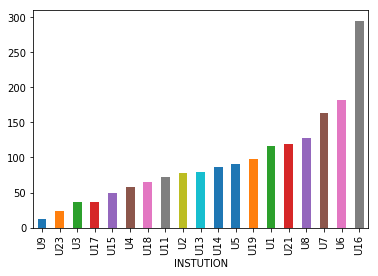

In [17]:
#count of surveys per instition
fig, ax = plt.subplots()
df.groupby('K1').count()['Survey_Code'].sort_values().rename(
    index={1:'U1',2:'U2',3:'U3',4:'U4',5:'U5',6:'U6',7:'U7',8:'U8',9:'U9',10:'U10',
          11:'U11',12:'U12',13:'U13',14:'U14',15:'U15',16:'U16',17:'U17',18:'U18',19:'U19',
          20:'U20',21:'U21',22:'U22',23:'U23'}).plot(
    kind='bar')
ax.set_xlabel("INSTUTION")

Text(0.5, 0, 'CLASS')

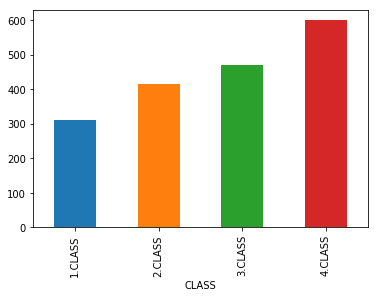

In [18]:
#People classes who involved in survey
fig, ax = plt.subplots()
ax=df.groupby('K2').count()['Survey_Code'].sort_values().rename(index={1:'1.CLASS',2:'2.CLASS',3:'3.CLASS',4:'4.CLASS'}).plot(kind='bar')
ax.set_xlabel("CLASS")

Text(0.5, 0, 'Gender')

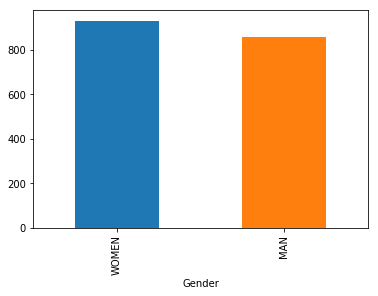

In [19]:
#gender based distribution
fig, ax = plt.subplots()
ax=df.groupby('K3').count()['Survey_Code'].rename(index={1:'WOMEN',2:'MAN'}).plot(kind='bar')
ax.set_xlabel("Gender")

Text(0.5, 0, 'SUB_CLASS')

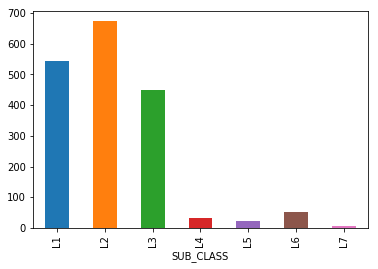

In [22]:
#lets look at sub classes
fig, ax = plt.subplots()
ax=df.groupby('K5').count()['Survey_Code'].rename(
    index={1:'L1',2:'L2',3:'L3',4:'L4',5:'L5',6:'L6',7:'L7'}).plot(kind='bar')
ax.set_xlabel("SUB_CLASS")

In [23]:
df.groupby('K5').describe()[['K6','K7']].rename(
    index={1:'L1',2:'L2',3:'L3',4:'L4',5:'L5',6:'L6',7:'L7'}).rename(
    columns={'K6': 'Degree_of_Mean','K7':'Preffered_Order'})

Degree_of_Mean                                                       \
            count      mean       std    min    25%    50%   75%   max   
K5                                                                       
L1          504.0  3.668734  0.691744  1.150  3.250  3.700  4.15  5.00   
L2          646.0  3.951929  0.694564  0.337  3.600  3.900  4.50  5.00   
L3          427.0  4.033270  0.685744  0.336  3.600  4.100  4.60  5.00   
L4           29.0  3.425259  1.276251  0.300  3.200  3.800  4.19  5.00   
L5           22.0  3.378636  1.048279  0.400  3.025  3.605  3.89  4.90   
L6           45.0  3.868000  0.949927  1.400  3.500  3.950  4.59  5.00   
L7            5.0  3.396000  0.399662  2.800  3.260  3.400  3.75  3.77   

   Preffered_Order                                                 
             count      mean       std  min  25%  50%   75%   max  
K5                                                                 
L1           531.0  9.510358  5.719990  1.0  5.0  8.0  13.0  25.0  
L2           659.0  8.536692  5.337378  1.0  4.0  7.0  12.0  24.0  
L3           444.0  8.891892  5.550265  1.0  4.0  8.0  12.0  24.0  
L4            30.0  6.100000  5.188515  1.0  3.0  4.0   7.0  21.0  
L5            22.0  6.681818  4.098622  1.0  4.0  6.0   7.0  17.0  
L6            52.0  6.403846  4.683135  1.0  3.0  5.5   8.0  21.0  
L7             7.0  7.571429  5.318432  4.0  4.0  7.0   7.5  19.0

In [24]:
df.head(2)

,Survey_Code,K1,K2,K3,K4,K5,K6,K7,K8,K9,...,K152,K153,K154,K155,K156,K156A,K157,K158,K159,K155a
1,OM1,16.0,1.0,1.0,1.0,1.0,2.90,14.0,3.0,NaN,...,2.0,6,2.0,2.0,1.0,NaN,1300.0,3.0,24.0,2.0
2,OM2,16.0,1.0,1.0,1.0,3.0,3.15,1.0,2.0,NaN,...,2.0,6,1.0,3.0,1.0,NaN,850.0,2.0,9.0,3.0


In [25]:
#lets look regard to mostly preferred 5 sub classes
analysis_list=[]
for i in range(1,5):
     analysis_list.append(df[(df['K5'] == i)].groupby(['K1','K5']).mean()[['K6','K7']])

In [27]:
# which instituion surveyers preferred with 3.9 and above success point ? and which class they came from ?
xx=pd.DataFrame()
for i in range(len(analysis_list)):
    xx=xx.append(analysis_list[i])

xx2=xx
sub_class={1:'L1',2:'L2',3:'L3',4:'L4',5:'L5',6:'L6',7:'L7'}
institution={1:'U1',2:'U2',3:'U3',4:'U4',5:'U5',6:'U6',7:'U7',8:'U8',9:'U9',10:'U10',
          11:'U11',12:'U12',13:'U13',14:'U14',15:'U15',16:'U16',17:'U17',18:'U18',19:'U19',
          20:'U20',21:'U21',22:'U22',23:'U23'}

def map_level(df, dct, level=0):
    index = df.index
    index.set_levels([[dct.get(item, item) for item in names] if i==level else names
                      for i, names in enumerate(index.levels)], inplace=True)

map_level(xx2, institution, level=0)    
map_level(xx2, sub_class, level=1)
xx2=xx2.reset_index()
xx2=xx2.rename(columns={'K1':'INSTITUION','K5':'SUB_CLASS','K6': 'Degree_Of_Success','K7':'Order_of_Prefer'})
xx2=xx2[(xx2.Degree_Of_Success >=3.90)]
xx2.groupby(['INSTITUION','SUB_CLASS']).agg({'Degree_Of_Success':'mean','Order_of_Prefer':'mean'}).sort_values(['Degree_Of_Success'],ascending=False)

Degree_Of_Success  Order_of_Prefer
INSTITUION SUB_CLASS                                    
U23        L2                  4.750000         6.000000
U9         L3                  4.646667         2.800000
U8         L3                  4.503600         7.160000
U2         L3                  4.470000         7.812500
           L4                  4.400000         5.000000
U21        L4                  4.383333         2.333333
U17        L2                  4.323333         5.037037
U2         L2                  4.317879         7.781250
U21        L3                  4.273077         7.650000
U9         L2                  4.270000        10.000000
           L1                  4.270000         1.500000
U6         L3                  4.256038         8.472727
U8         L2                  4.246835         6.000000
           L1                  4.226667         6.857143
U21        L2                  4.212642         7.886792
           L1                  4.142667         7.666667
U2         L1                  4.106000         6.714286
U7         L3                  4.087333         7.782609
U14        L1                  4.072000         8.000000
           L3                  4.065227         8.045455
U6         L2                  4.064449         7.514286
           L1                  4.021579         6.897436
U11        L1                  3.993000         8.684211
U14        L2                  3.983816         8.358974
U5         L3                  3.980556         9.111111
U7         L2                  3.972667         7.540984
U19        L2                  3.964783        11.833333
U5         L1                  3.959412         8.764706
U3         L3                  3.956667         5.555556
U11        L2                  3.954583         9.291667

In [28]:
pd.crosstab(df.K29, df.K2, margins=True,dropna=False)

K2,1.0,2.0,3.0,4.0,All
K29,,,,,
1.0,7,7,9,16,39
2.0,22,31,40,60,153
3.0,69,83,84,117,353
4.0,165,220,230,285,900
5.0,37,51,55,60,203
All,311,415,469,599,1794


In [29]:
df_r1=df[['K2','K29']]
df_r2=df_r1[pd.isnull(df_r1).any(axis=1)]
df_r2.K29.isnull().groupby(df['K2']).sum().astype(int)

K2
1.0    11
2.0    23
3.0    51
4.0    61
Name: K29, dtype: int32

In [30]:
df_reduced=df[['K1','K2','K29','K31','K32','K33','K34','K35','K36','K37','K38','K39','K40','K41','K42','K43','K44','K45',
              'K67','K68','K69','K70','K71','K72','K73','K74','K75','K76','K77','K78','K79','K80','K81','K82','K84',
              'K109','K110']]

In [31]:
#row count left
len(df_reduced)

1794

In [32]:
#column count left
len(df_reduced.columns)

37

In [33]:
#general sight
df_reduced.head(5)

,K1,K2,K29,K31,K32,K33,K34,K35,K36,K37,...,K76,K77,K78,K79,K80,K81,K82,K84,K109,K110
1,16.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,4.0,3.0,2.0,3.0,3.0,5.0,6.0,6.0
2,16.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,5.0,5.0
3,16.0,1.0,4.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,5.0
4,16.0,1.0,4.0,1.0,4.0,2.0,3.0,4.0,4.0,2.0,...,1.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,9.0,9.0
5,16.0,1.0,4.0,3.0,5.0,4.0,3.0,2.0,2.0,4.0,...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,5.0,6.0,7.0


In [34]:
#check nulls
df_reduced.isnull().sum().sort_values(ascending=False)

K29     146
K40      69
K31      62
K44      49
K35      48
K45      48
K41      47
K38      46
K37      40
K43      40
K34      32
K42      27
K39      23
K33      23
K32      23
K75      21
K36      20
K76      19
K77      18
K110     13
K109     13
K73      13
K79      13
K82      13
K70      12
K74      12
K78      12
K69      10
K80      10
K81      10
K71       8
K68       8
K84       5
K72       4
K67       3
K2        0
K1        0
dtype: int64

In [35]:
# lets impute mean for columns including nulls based on instition and sub class
df_null=df_reduced.columns[df_reduced.isnull().any()].tolist()
#df_null
for i in df_null:
    #import ipdb;ipdb.set_trace();    
    df_reduced[i]= df_reduced.groupby(['K1','K2'])[i].apply(lambda x: x.fillna(x.mean()))

In [36]:
df_reduced.isnull().sum().sort_values(ascending=False)

K110    0
K45     0
K43     0
K42     0
K41     0
K40     0
K39     0
K38     0
K37     0
K36     0
K35     0
K34     0
K33     0
K32     0
K31     0
K29     0
K2      0
K44     0
K67     0
K109    0
K68     0
K84     0
K82     0
K81     0
K80     0
K79     0
K78     0
K77     0
K76     0
K75     0
K74     0
K73     0
K72     0
K71     0
K70     0
K69     0
K1      0
dtype: int64

In [37]:
df_reduced=df_reduced.drop(columns=['K2'])
df_reduced.head(5)

,K1,K29,K31,K32,K33,K34,K35,K36,K37,K38,...,K76,K77,K78,K79,K80,K81,K82,K84,K109,K110
1,16.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,4.0,3.0,2.0,3.0,3.0,5.0,6.0,6.0
2,16.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,5.0,5.0
3,16.0,4.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,5.0
4,16.0,4.0,1.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,...,1.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,9.0,9.0
5,16.0,4.0,3.0,5.0,4.0,3.0,2.0,2.0,4.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,5.0,6.0,7.0


In [38]:
df_reduced.columns

Index(['K1', 'K29', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37', 'K38',
       'K39', 'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K67', 'K68', 'K69',
       'K70', 'K71', 'K72', 'K73', 'K74', 'K75', 'K76', 'K77', 'K78', 'K79',
       'K80', 'K81', 'K82', 'K84', 'K109', 'K110'],
      dtype='object')

In [39]:
# the number of applied survey per instituions are different so lets sample dataset randomly into different parts.
# highly survey applied institions values can lead inproper results,so this is a design of experiment to get fair distribution 
# and results to prevent highly volumed surveys effect

smp={}
for i in range(0,7):
    smp[i] = df_reduced.sample(frac=0.1666666)

In [40]:
#counts per new constructed random sub groups
for key,value in smp.items():
    print(key, len(value)) 

0 299
1 299
2 299
3 299
4 299
5 299
6 299


In [41]:
# view of 1 group
smp[1].head()

,K1,K29,K31,K32,K33,K34,K35,K36,K37,K38,...,K76,K77,K78,K79,K80,K81,K82,K84,K109,K110
1186,14.0,4.00000,1.00,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,1.0,2.0,2.0,7.0,7.0
1403,5.0,4.00000,2.75,4.0,3.0,3.0,2.0,4.0,3.0,2.0,...,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,7.0,6.0
538,7.0,4.00000,3.00,5.0,4.0,3.0,4.0,4.0,3.0,3.0,...,3.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,8.0,8.0
2,16.0,3.00000,3.00,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,5.0,3.0,4.0,3.0,4.0,5.0,5.0,5.0
514,6.0,3.27451,3.00,3.0,4.0,2.0,4.0,3.0,3.0,3.0,...,2.0,3.0,1.0,4.0,3.0,1.0,3.0,4.0,2.0,2.0


In [42]:
# I created sub groups for every questionnaire for every sample
p1={}
p2={}
p3={}
for key,value in smp.items():
    p1[key]=smp[key].iloc[:,np.r_[0:2,2:17]]
    p2[key]=smp[key].iloc[:,np.r_[0,17:34]]
    p3[key]=smp[key].iloc[:,np.r_[0,34:36]]

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

p1_tr={}
for key,value in p1.items():
    p1_tr[key]= sc.fit_transform(p1[key].iloc[:,2:17])  

from sklearn.decomposition import PCA

p1_tr_pca={}
explained_variance_p1={}
for key,value in p1_tr.items():
    pca = PCA(n_components=3)  
    p1_tr_pca[key]=pca.fit_transform(p1_tr[key])
    explained_variance_p1[key] = pca.explained_variance_ratio_ 

explained_variance_p1


{0: array([0.46170709, 0.08654449, 0.08146548]),
 1: array([0.48832649, 0.08293582, 0.07516253]),
 2: array([0.45843198, 0.09811638, 0.08918061]),
 3: array([0.45324332, 0.09956686, 0.07897489]),
 4: array([0.42800757, 0.10532743, 0.08740396]),
 5: array([0.48070809, 0.08109496, 0.07317834]),
 6: array([0.48096627, 0.08634131, 0.08371497])}

In [44]:
p1_comp={}
for key,value in p1.items():
     p1_comp[key]=pd.DataFrame(pca.components_,columns=p1[key].iloc[:,2:17].columns,index = ['PC-1','PC-2','PC-3'])

for key,value in p1_comp.items():
    print(key,value)

0            K31       K32       K33       K34       K35       K36       K37  \
PC-1  0.229218  0.259942  0.280616  0.298856  0.239368  0.272566  0.256835   
PC-2 -0.064404 -0.061001 -0.061398 -0.230033 -0.211241 -0.300289 -0.375903   
PC-3  0.197462 -0.350526 -0.450976  0.097150  0.001606 -0.033748  0.109280   

           K38       K39       K40       K41       K42       K43       K44  \
PC-1  0.248770  0.220239  0.193416  0.266990  0.244785  0.290340  0.265056   
PC-2 -0.196479 -0.236952  0.408363  0.216100  0.162425  0.272349  0.403639   
PC-3  0.170918  0.294234  0.065709 -0.284914 -0.482403  0.161451  0.250808   

           K45  
PC-1  0.284110  
PC-2  0.296069  
PC-3  0.298790  
1            K31       K32       K33       K34       K35       K36       K37  \
PC-1  0.229218  0.259942  0.280616  0.298856  0.239368  0.272566  0.256835   
PC-2 -0.064404 -0.061001 -0.061398 -0.230033 -0.211241 -0.300289 -0.375903   
PC-3  0.197462 -0.350526 -0.450976  0.097150  0.001606 -0.033748  0.

In [45]:
p1_bf_union={}
for key,value in p1_tr_pca.items():
    p1_bf_union[key]=pd.DataFrame(p1_tr_pca[key]).iloc[:,0]

In [46]:
p1_df=pd.DataFrame(p1_bf_union)
p1_df.head(5)

,0,1,2,3,4,5,6
0,-1.790794,-4.568052,2.961911,-0.810490,2.296342,1.860194,1.250235
1,4.356362,1.064245,2.102953,-3.767073,-1.596815,-4.094746,3.264591
2,4.445601,2.146050,2.403070,3.190691,-4.423628,-0.743609,1.691478
3,-3.678827,0.758349,2.099395,0.878043,2.456475,1.567135,-4.411170
4,4.568048,-1.872322,-4.236619,-0.594969,-1.909099,-3.453317,1.214010


In [47]:
res_p1={}
from scipy.stats import ttest_ind
for i in range(len(p1_df.columns)):
    for m in range(1,len(p1_df.columns)):
        res_p1[i,m]=ttest_ind(p1_df.iloc[:,i], p1_df.iloc[:,m], equal_var=False)

for key,value in res_p1.items():
    #print(key,value[1])
    print(key,'Statistics=%.3f, p=%.3f' % (value[0], value[1]))
# interpret
    alpha = 0.05
    if value[1] > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

(0, 1) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 2) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 3) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 5) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 6) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 2) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 3) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 5) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 6) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(2, 1) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(2, 2) Statistics=0.000, p=1.000
Same distributions (fail to

In [48]:
#lets add most variance explained component
for key,value in p1.items():
    p1[key]['pca_1']=np.array(p1_bf_union[key])

In [49]:
#pca
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

p2_tr={}
for key,value in p2.items():
    p2_tr[key]= sc.fit_transform(p2[key].iloc[:,1:19])  

from sklearn.decomposition import PCA

p2_tr_pca={}
explained_variance_p2={}

for key,value in p2_tr.items():
    pca = PCA(n_components=3)  
    p2_tr_pca[key]=pca.fit_transform(p2_tr[key])
    explained_variance_p2[key] = pca.explained_variance_ratio_ 

explained_variance_p2

{0: array([0.36635578, 0.08500746, 0.0684042 ]),
 1: array([0.40153307, 0.08497152, 0.06265867]),
 2: array([0.38285965, 0.08748037, 0.06270154]),
 3: array([0.37052743, 0.08486339, 0.06695052]),
 4: array([0.34298382, 0.08301574, 0.07109358]),
 5: array([0.37271589, 0.08343801, 0.06683689]),
 6: array([0.37621324, 0.08758947, 0.06761492])}

In [50]:
p2_comp={}
for key,value in p2.items():
     p2_comp[key]=pd.DataFrame(pca.components_,columns=p2[key].iloc[:,1:19].columns,index = ['PC-1','PC-2','PC-3'])

for key,value in p2_comp.items():
    print(key,value)

0            K67       K68       K69       K70       K71       K72       K73  \
PC-1  0.271576  0.309634  0.303309  0.214382  0.195235  0.293313  0.250457   
PC-2 -0.085100  0.194030  0.067036  0.084708  0.247164  0.275685  0.269265   
PC-3 -0.026049 -0.141976  0.130112  0.388798  0.428301 -0.233371 -0.227610   

           K74       K75       K76       K77       K78       K79       K80  \
PC-1  0.191436  0.252489  0.294056  0.266459  0.275711  0.126461  0.243892   
PC-2  0.063776 -0.067249 -0.042475  0.105520 -0.069527 -0.008785 -0.445938   
PC-3 -0.209601 -0.099622 -0.033680 -0.221324  0.051311  0.618251 -0.045588   

           K81       K82       K84  
PC-1  0.225680  0.211161 -0.025671  
PC-2 -0.506833 -0.240351 -0.440336  
PC-3  0.091367 -0.006775 -0.148475  
1            K67       K68       K69       K70       K71       K72       K73  \
PC-1  0.271576  0.309634  0.303309  0.214382  0.195235  0.293313  0.250457   
PC-2 -0.085100  0.194030  0.067036  0.084708  0.247164  0.275685  

In [51]:
p2_bf_union={}
for key,value in p2_tr_pca.items():
    p2_bf_union[key]=pd.DataFrame(p2_tr_pca[key]).iloc[:,0]

In [52]:
p2_df=pd.DataFrame(p2_bf_union)
p2_df.head(5)

,0,1,2,3,4,5,6
0,1.310920,0.588092,-6.931757,-3.760188,-0.805140,-4.903352,-2.276825
1,-4.539705,1.533059,1.078661,-3.586857,-2.098034,0.091558,0.445418
2,-2.536690,1.718929,-2.301891,1.704581,-2.753195,1.735956,2.376896
3,2.267096,4.507879,-3.855528,1.252503,2.422725,-1.176023,0.780641
4,-3.672931,-2.699989,1.476563,-0.066673,1.550552,4.342316,-1.009023


In [53]:
res_p2={}
from scipy.stats import ttest_ind
for i in range(len(p2_df.columns)):
    for m in range(1,len(p2_df.columns)):
        res_p2[i,m]=ttest_ind(p2_df.iloc[:,i], p2_df.iloc[:,m], equal_var=False)

for key,value in res_p2.items():
    #print(key,value[1])
    print(key,'Statistics=%.3f, p=%.3f' % (value[0], value[1]))
# interpret
    alpha = 0.05
    if value[1] > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

(0, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 2) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 3) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 5) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 2) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 3) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 5) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 2) Statistics=0.000, p=1.000
Same distributions (fail to re

In [54]:
# lets add component which explains variance mostt
for key,value in p2.items():
    p2[key]['pca_2']=np.array(p2_bf_union[key])

In [55]:
#pca
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

p3_tr={}
for key,value in p3.items():
    p3_tr[key]= sc.fit_transform(p3[key].iloc[:,1:3])  

from sklearn.decomposition import PCA

p3_tr_pca={}
explained_variance_p3={}
for key,value in p3_tr.items():
    pca = PCA(n_components=2)  
    p3_tr_pca[key]=pca.fit_transform(p3_tr[key])
    explained_variance_p3[key] = pca.explained_variance_ratio_ 

explained_variance_p3

{0: array([0.7522375, 0.2477625]),
 1: array([0.78942343, 0.21057657]),
 2: array([0.77119393, 0.22880607]),
 3: array([0.80630887, 0.19369113]),
 4: array([0.74018596, 0.25981404]),
 5: array([0.7824208, 0.2175792]),
 6: array([0.77705468, 0.22294532])}

In [56]:
p3_comp={}
for key,value in p3.items():
     p3_comp[key]=pd.DataFrame(pca.components_,columns=p3[key].iloc[:,0:2].columns,index = ['PC-1','PC-2'])

for key,value in p3_comp.items():
    print(key,value)

0             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
1             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
2             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
3             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
4             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
5             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107
6             K1      K109
PC-1 -0.707107 -0.707107
PC-2 -0.707107  0.707107


In [57]:
p3_bf_union={}
for key,value in p3_tr_pca.items():
    p3_bf_union[key]=pd.DataFrame(p3_tr_pca[key]).iloc[:,0]

In [58]:
p3_df=pd.DataFrame(p3_bf_union)
p3_df.head(5)

,0,1,2,3,4,5,6
0,-0.023312,-0.738686,-1.818198,-0.533584,-2.160303,-0.626717,0.725457
1,-1.902959,-0.449738,-0.267404,-0.572964,1.444170,-0.600062,2.201977
2,-0.349099,-1.345152,-0.267404,-0.239644,2.119112,-0.292550,0.019758
3,-1.301434,0.474245,-0.929268,-2.454747,2.148790,0.242510,0.315062
4,-1.276410,2.293642,-2.114508,-0.279024,0.242679,2.341786,0.077304


In [59]:
res_p3={}
from scipy.stats import ttest_ind
for i in range(len(p3_df.columns)):
    for m in range(1,len(p3_df.columns)):
        res_p3[i,m]=ttest_ind(p3_df.iloc[:,i], p3_df.iloc[:,m], equal_var=False)

for key,value in res_p3.items():
    #print(key,value[1])
    print(key,'Statistics=%.3f, p=%.3f' % (value[0], value[1]))
# interpret
    alpha = 0.05
    if value[1] > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

(0, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 2) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 3) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(0, 4) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 5) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(0, 6) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(1, 2) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 3) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 4) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 5) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(1, 6) Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)
(2, 1) Statistics=0.000, p=1.000
Same distributions (fail to reject H0)
(2, 2) Statistics=0.000, p=1.000
Same distributions (fail 

In [60]:
#lets add most variance explained component
for key,value in p3.items():
    p3[key]['pca_3']=np.array(p3_bf_union[key])

In [61]:
#lets union all splitted sub tables 
result={}
for key,value in p1.items():
    #result = p1[key].join(p2[key], on='K1',how='left')
    result[key]=pd.concat([p1[key], p2[key], p3[key]], axis=1, join='inner')
    

In [62]:
# make it data frame
res=pd.DataFrame()
for i in range(0,6):
    res=res.append(result[i])

In [63]:
res.head(5)

,K1,K29,K31,K32,K33,K34,K35,K36,K37,K38,...,K79,K80,K81,K82,K84,pca_2,K1,K109,K110,pca_3
969,2.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,...,3.0,1.0,2.0,2.0,4.0,1.310920,2.0,6.0,6.0,-0.023312
886,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3.0,3.0,3.0,4.0,3.0,-4.539705,1.0,9.0,9.0,-1.902959
925,1.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,4.0,2.0,2.0,2.0,4.0,-2.536690,1.0,7.0,6.0,-0.349099
61,16.0,4.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,...,4.0,1.0,1.0,2.0,5.0,2.267096,16.0,9.0,7.0,-1.301434
842,1.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,3.0,...,4.0,4.0,3.0,5.0,4.0,-3.672931,1.0,8.0,8.0,-1.276410


In [64]:
#lets take finally interested variables and pca's
final_table=res[['K1','K29','pca_1','pca_2','pca_3']]

In [65]:
#data cleaning
columnNumbers = [x for x in range(final_table.shape[1])]
columnNumbers.remove(0)
columnNumbers.remove(1)
final_table=final_table.iloc[:, columnNumbers]

In [66]:
#general view
final_table=pd.DataFrame(final_table)
final_table.head(5)

,K1,K29,pca_1,pca_2,pca_3
969,2.0,4.0,-1.790794,1.310920,-0.023312
886,1.0,4.0,4.356362,-4.539705,-1.902959
925,1.0,4.0,4.445601,-2.536690,-0.349099
61,16.0,4.0,-3.678827,2.267096,-1.301434
842,1.0,4.0,4.568048,-3.672931,-1.276410


In [67]:
# lets scale K29 question which surveyers give general evaluation,by this every variable will be in same scale

final_table2=final_table
final_table2['K29_X'] = sc.fit_transform(np.array(final_table2['K29']).reshape(-1,1))
final_table2.head(5)

,K1,K29,pca_1,pca_2,pca_3,K29_X
969,2.0,4.0,-1.790794,1.310920,-0.023312,0.40013
886,1.0,4.0,4.356362,-4.539705,-1.902959,0.40013
925,1.0,4.0,4.445601,-2.536690,-0.349099,0.40013
61,16.0,4.0,-3.678827,2.267096,-1.301434,0.40013
842,1.0,4.0,4.568048,-3.672931,-1.276410,0.40013


In [68]:
#transform every variable between 0-100
final_table2['pca_1_tr'] =(final_table2.pca_1-min(final_table2.pca_1))/(max(final_table2.pca_1)-min(final_table2.pca_1))*100
final_table2['pca_2_tr'] =(final_table2.pca_2-min(final_table2.pca_2))/(max(final_table2.pca_2)-min(final_table2.pca_2))*100
final_table2['pca_3_tr'] =(final_table2.pca_3-min(final_table2.pca_3))/(max(final_table2.pca_3)-min(final_table2.pca_3))*100
final_table2['pca_K29_X_tr'] =(final_table2.K29_X-min(final_table2.K29_X))/(max(final_table2.K29_X)-min(final_table2.K29_X))*100

In [69]:
final_table2.head(5)

,K1,K29,pca_1,pca_2,pca_3,K29_X,pca_1_tr,pca_2_tr,pca_3_tr,pca_K29_X_tr
969,2.0,4.0,-1.790794,1.310920,-0.023312,0.40013,30.160974,57.731749,44.093071,75.0
886,1.0,4.0,4.356362,-4.539705,-1.902959,0.40013,78.001992,16.753946,11.396071,75.0
925,1.0,4.0,4.445601,-2.536690,-0.349099,0.40013,78.696507,30.783073,38.425916,75.0
61,16.0,4.0,-3.678827,2.267096,-1.301434,0.40013,15.467123,64.428808,21.859761,75.0
842,1.0,4.0,4.568048,-3.672931,-1.276410,0.40013,79.649464,22.824837,22.295071,75.0


In [70]:
#lets take final variables
final_table3=final_table2[['K1','pca_1_tr','pca_2_tr','pca_3_tr','pca_K29_X_tr']]
final_table3=pd.DataFrame(final_table3)
final_table3.head(5)

,K1,pca_1_tr,pca_2_tr,pca_3_tr,pca_K29_X_tr
969,2.0,30.160974,57.731749,44.093071,75.0
886,1.0,78.001992,16.753946,11.396071,75.0
925,1.0,78.696507,30.783073,38.425916,75.0
61,16.0,15.467123,64.428808,21.859761,75.0
842,1.0,79.649464,22.824837,22.295071,75.0


In [71]:
# lets take mean per every row to get a score of given answers to 4 survey categories.by this we will get a score for every
# surveyers

final_table3['row_score']=final_table3.iloc[:,1:5].mean(axis=1)
final_table3.head(5)

,K1,pca_1_tr,pca_2_tr,pca_3_tr,pca_K29_X_tr,row_score
969,2.0,30.160974,57.731749,44.093071,75.0,51.746449
886,1.0,78.001992,16.753946,11.396071,75.0,45.288002
925,1.0,78.696507,30.783073,38.425916,75.0,55.726374
61,16.0,15.467123,64.428808,21.859761,75.0,44.188923
842,1.0,79.649464,22.824837,22.295071,75.0,49.942343


In [72]:
# lets take the raw score found for every attendee and take the mean of them based on instition to reach final 
# satisfaction score for every instituion.

Results=final_table3.groupby(['K1']).mean()['row_score'].sort_values(ascending=False).rename(
    index={1:'U1',2:'U2',3:'U3',4:'U4',5:'U5',6:'U6',7:'U7',8:'U8',9:'U9',10:'U10',
          11:'U11',12:'U12',13:'U13',14:'U14',15:'U15',16:'U16',17:'U17',18:'U18',19:'U19',
          20:'U20',21:'U21',22:'U22',23:'U23'})

In [73]:
#Result:
Results=pd.DataFrame(Results).reset_index()
Results.columns = ['Instituion', 'Satisfaction_Score']
Results

,Instituion,Satisfaction_Score
0,U1,56.369537
1,U4,54.302064
2,U11,54.032983
3,U5,53.161216
4,U19,53.018626
5,U7,52.865319
6,U3,52.780743
7,U17,52.392454
8,U15,51.899469
9,U8,51.759188
